In [1]:
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
ds_all_resuts = xr.open_dataset('/Users/kramea/Documents/AIBEDO_dir/data_aibedo/predictions_CESM2_val_3b6fg6sb_MLP_spherical_0constraints.nc')
ds_all = xr.open_dataset('/Users/kramea/Documents/AIBEDO_dir/data_aibedo/compress.isosph.CESM2.historical.r1i1p1f1.Input.Exp8_fixed.nc')

In [3]:
from sklearn.metrics import mean_squared_error

In [4]:
lon = ds_all.lon.data
lat = ds_all.lat.data

In [5]:
#create parition information dataframe
def get_lat_lon_df(lat, lon, gt, pred):
    new_array = np.vstack((lat, lon, gt, pred))
    # print(new_array.shape)
    column_name = ['lat', 'lon', 'gt', 'pred']
    # creating the dataframe
    new_df = pd.DataFrame(data = new_array.T, columns = column_name)
    return new_df

In [18]:
rmselist_time_1 = []
for t in range(297):
    rmse_list = []
    temp_gt = ds_all_resuts.tas_targets.data[t,:]
    temp_pred = ds_all_resuts.tas_preds.data[t,:]
    temp_df = get_lat_lon_df(lat, lon, temp_gt, temp_pred)
    
    temp_mean = np.mean(temp_gt)

    for lt in range(-90, 90, 5):

        tt_gt = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['gt'].values
        tt_pred = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['pred'].values

        rr = mean_squared_error(tt_gt, tt_pred, squared=False)
        #rmse_list.append(rr/temp_mean)
        rmse_list.append(rr)
        # print(rr)
        # print(lt, lt+5)
    rmselist_time_1.append(rmse_list)

In [26]:
## Actual values

gt_list_tas = []
for t in range(297):
    gt_list = []
    temp_gt = ds_all_resuts.tas_targets.data[t,:]
    temp_pred = ds_all_resuts.tas_preds.data[t,:]
    temp_df = get_lat_lon_df(lat, lon, temp_gt, temp_pred)
    
    temp_mean = np.mean(temp_gt)

    for lt in range(-90, 90, 5):

        tt_gt = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['gt'].values
        #tt_pred = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['pred'].values

        #rr = mean_squared_error(tt_gt, tt_pred, squared=False)
        #rmse_list.append(rr/temp_mean)
        gt_list.append(np.mean(tt_gt))
        # print(rr)
        # print(lt, lt+5)
    gt_list_tas.append(gt_list)

In [32]:
## predicted values

pd_list_tas = []
for t in range(297):
    pd_list = []
    temp_gt = ds_all_resuts.tas_targets.data[t,:]
    temp_pred = ds_all_resuts.tas_preds.data[t,:]
    temp_df = get_lat_lon_df(lat, lon, temp_gt, temp_pred)
    
    temp_mean = np.mean(temp_gt)

    for lt in range(-90, 90, 5):

        #tt_gt = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['gt'].values
        tt_pred = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['pred'].values

        #rr = mean_squared_error(tt_gt, tt_pred, squared=False)
        #rmse_list.append(rr/temp_mean)
        pd_list.append(np.mean(tt_pred))
        # print(rr)
        # print(lt, lt+5)
    pd_list_tas.append(pd_list)

In [19]:
rmselist_time_array = np.array(rmselist_time_1)
tas_mean_curve = np.mean(rmselist_time_array, axis=0)
tas_std_curve = np.std(rmselist_time_array, axis=0)

In [27]:
gtlist_time_array = np.array(gt_list_tas)
tas_gt_mean_curve = np.mean(gtlist_time_array, axis=0)
tas_gt_std_curve = np.std(gtlist_time_array, axis=0)

In [33]:
pdlist_time_array = np.array(pd_list_tas)
tas_pd_mean_curve = np.mean(pdlist_time_array, axis=0)
tas_pd_std_curve = np.std(pdlist_time_array, axis=0)

In [28]:
tas_gt_mean_curve

array([229.96290679, 236.24519029, 238.86596524, 247.69645849,
       260.36835913, 269.85333905, 274.66611883, 277.69220106,
       280.82090039, 284.30196187, 287.7776199 , 290.72677483,
       293.25776161, 295.33572698, 296.82220191, 298.15772023,
       299.09327749, 299.31632702, 299.64212936, 299.99353987,
       299.89804722, 298.8090864 , 297.11411269, 294.40170677,
       290.19882078, 287.23799159, 284.15695072, 280.06599061,
       276.65806804, 273.78682551, 269.29772148, 264.6212016 ,
       261.28320383, 258.05899499, 256.42086463, 256.36659545])

In [29]:
import matplotlib.pyplot as plt

In [43]:
x = np.linspace(-90,90, 36)

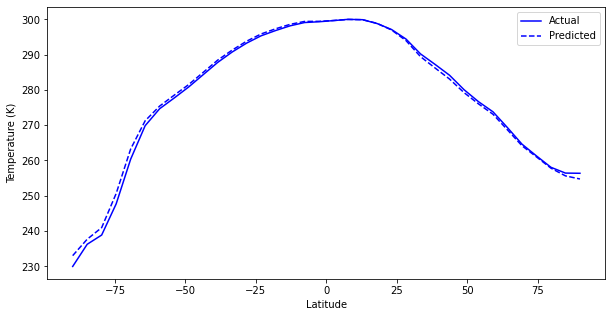

In [45]:
plt.figure(figsize=(10,5))
#x = np.arange(len(tas_mean_curve))
plt.plot(x, tas_gt_mean_curve, 'b-', label='Actual')
#plt.fill_between(x, tas_gt_mean_curve - tas_gt_std_curve, tas_gt_mean_curve + tas_gt_std_curve, color='b', alpha=0.2)

plt.plot(x, tas_pd_mean_curve, 'b--', label='Predicted')
#plt.fill_between(x, tas_pd_mean_curve - tas_pd_std_curve, tas_pd_mean_curve + tas_pd_std_curve, color='r', alpha=0.2)

# plt.plot(x, pr_mean_curve, 'g-', label='pr')
# plt.fill_between(x, pr_mean_curve - pr_std_curve, pr_mean_curve + pr_std_curve, color='g', alpha=0.2)

plt.xlabel('Latitude')
# plt.ylabel('RMSE (K)')
plt.ylabel('Temperature (K)')


plt.legend()
plt.show()

In [46]:
rmselist_time_1 = []
for t in range(297):
    rmse_list = []
    temp_gt = ds_all_resuts.ps_targets.data[t,:]
    temp_pred = ds_all_resuts.ps_preds.data[t,:]
    temp_df = get_lat_lon_df(lat, lon, temp_gt, temp_pred)
    
    temp_mean = np.mean(temp_gt)

    for lt in range(-90, 90, 5):

        tt_gt = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['gt'].values
        tt_pred = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['pred'].values

        rr = mean_squared_error(tt_gt, tt_pred, squared=False)
        #rmse_list.append(rr/temp_mean)
        rmse_list.append(rr)
        # print(rr)
        # print(lt, lt+5)
    rmselist_time_1.append(rmse_list)

In [47]:
## Actual values

gt_list_tas = []
for t in range(297):
    gt_list = []
    temp_gt = ds_all_resuts.ps_targets.data[t,:]
    temp_pred = ds_all_resuts.ps_preds.data[t,:]
    temp_df = get_lat_lon_df(lat, lon, temp_gt, temp_pred)
    
    temp_mean = np.mean(temp_gt)

    for lt in range(-90, 90, 5):

        tt_gt = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['gt'].values
        #tt_pred = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['pred'].values

        #rr = mean_squared_error(tt_gt, tt_pred, squared=False)
        #rmse_list.append(rr/temp_mean)
        gt_list.append(np.mean(tt_gt))
        # print(rr)
        # print(lt, lt+5)
    gt_list_tas.append(gt_list)

In [48]:
## predicted values

pd_list_tas = []
for t in range(297):
    pd_list = []
    temp_gt = ds_all_resuts.ps_targets.data[t,:]
    temp_pred = ds_all_resuts.ps_preds.data[t,:]
    temp_df = get_lat_lon_df(lat, lon, temp_gt, temp_pred)
    
    temp_mean = np.mean(temp_gt)

    for lt in range(-90, 90, 5):

        #tt_gt = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['gt'].values
        tt_pred = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['pred'].values

        #rr = mean_squared_error(tt_gt, tt_pred, squared=False)
        #rmse_list.append(rr/temp_mean)
        pd_list.append(np.mean(tt_pred))
        # print(rr)
        # print(lt, lt+5)
    pd_list_tas.append(pd_list)

In [49]:
rmselist_time_array = np.array(rmselist_time_1)
tas_mean_curve = np.mean(rmselist_time_array, axis=0)
tas_std_curve = np.std(rmselist_time_array, axis=0)

In [50]:
gtlist_time_array = np.array(gt_list_tas)
tas_gt_mean_curve = np.mean(gtlist_time_array, axis=0)
tas_gt_std_curve = np.std(gtlist_time_array, axis=0)

In [51]:
pdlist_time_array = np.array(pd_list_tas)
tas_pd_mean_curve = np.mean(pdlist_time_array, axis=0)
tas_pd_std_curve = np.std(pdlist_time_array, axis=0)

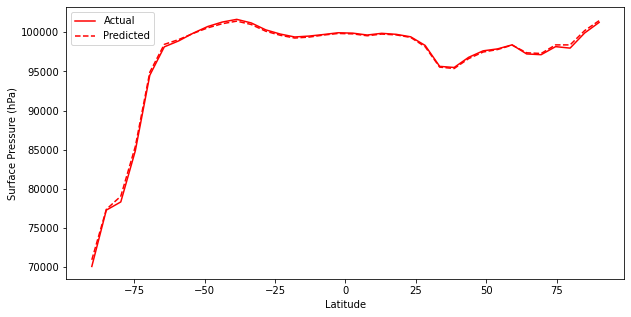

In [53]:
x = np.linspace(-90,90, 36)
plt.figure(figsize=(10,5))
#x = np.arange(len(tas_mean_curve))
plt.plot(x, tas_gt_mean_curve, 'r-', label='Actual')
#plt.fill_between(x, tas_gt_mean_curve - tas_gt_std_curve, tas_gt_mean_curve + tas_gt_std_curve, color='b', alpha=0.2)

plt.plot(x, tas_pd_mean_curve, 'r--', label='Predicted')
#plt.fill_between(x, tas_pd_mean_curve - tas_pd_std_curve, tas_pd_mean_curve + tas_pd_std_curve, color='r', alpha=0.2)

# plt.plot(x, pr_mean_curve, 'g-', label='pr')
# plt.fill_between(x, pr_mean_curve - pr_std_curve, pr_mean_curve + pr_std_curve, color='g', alpha=0.2)

plt.xlabel('Latitude')
# plt.ylabel('RMSE (K)')
plt.ylabel('Surface Pressure (hPa)')


plt.legend()
plt.show()

In [54]:
## Precipt

In [55]:
rmselist_time_1 = []
for t in range(297):
    rmse_list = []
    temp_gt = ds_all_resuts.pr_targets.data[t,:]
    temp_pred = ds_all_resuts.pr_preds.data[t,:]
    temp_df = get_lat_lon_df(lat, lon, temp_gt, temp_pred)
    
    temp_mean = np.mean(temp_gt)

    for lt in range(-90, 90, 5):

        tt_gt = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['gt'].values
        tt_pred = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['pred'].values

        rr = mean_squared_error(tt_gt, tt_pred, squared=False)
        #rmse_list.append(rr/temp_mean)
        rmse_list.append(rr)
        # print(rr)
        # print(lt, lt+5)
    rmselist_time_1.append(rmse_list)

In [56]:
## Actual values

gt_list_tas = []
for t in range(297):
    gt_list = []
    temp_gt = ds_all_resuts.pr_targets.data[t,:]
    temp_pred = ds_all_resuts.pr_preds.data[t,:]
    temp_df = get_lat_lon_df(lat, lon, temp_gt, temp_pred)
    
    temp_mean = np.mean(temp_gt)

    for lt in range(-90, 90, 5):

        tt_gt = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['gt'].values
        #tt_pred = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['pred'].values

        #rr = mean_squared_error(tt_gt, tt_pred, squared=False)
        #rmse_list.append(rr/temp_mean)
        gt_list.append(np.mean(tt_gt))
        # print(rr)
        # print(lt, lt+5)
    gt_list_tas.append(gt_list)

In [57]:
## predicted values

pd_list_tas = []
for t in range(297):
    pd_list = []
    temp_gt = ds_all_resuts.pr_targets.data[t,:]
    temp_pred = ds_all_resuts.pr_preds.data[t,:]
    temp_df = get_lat_lon_df(lat, lon, temp_gt, temp_pred)
    
    temp_mean = np.mean(temp_gt)

    for lt in range(-90, 90, 5):

        #tt_gt = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['gt'].values
        tt_pred = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['pred'].values

        #rr = mean_squared_error(tt_gt, tt_pred, squared=False)
        #rmse_list.append(rr/temp_mean)
        pd_list.append(np.mean(tt_pred))
        # print(rr)
        # print(lt, lt+5)
    pd_list_tas.append(pd_list)

In [58]:
rmselist_time_array = np.array(rmselist_time_1)
tas_mean_curve = np.mean(rmselist_time_array, axis=0)
tas_std_curve = np.std(rmselist_time_array, axis=0)

In [59]:
gtlist_time_array = np.array(gt_list_tas)
tas_gt_mean_curve = np.mean(gtlist_time_array, axis=0)
tas_gt_std_curve = np.std(gtlist_time_array, axis=0)

In [60]:
pdlist_time_array = np.array(pd_list_tas)
tas_pd_mean_curve = np.mean(pdlist_time_array, axis=0)
tas_pd_std_curve = np.std(pdlist_time_array, axis=0)

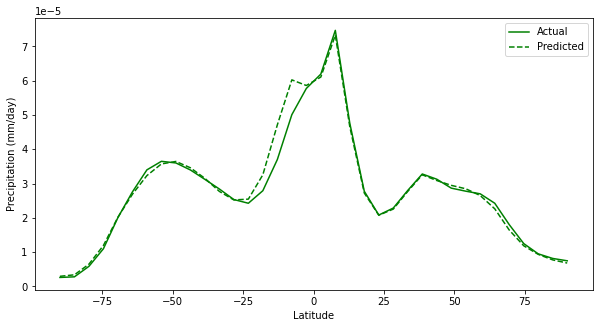

In [61]:
x = np.linspace(-90,90, 36)
plt.figure(figsize=(10,5))
#x = np.arange(len(tas_mean_curve))
plt.plot(x, tas_gt_mean_curve, 'g-', label='Actual')
#plt.fill_between(x, tas_gt_mean_curve - tas_gt_std_curve, tas_gt_mean_curve + tas_gt_std_curve, color='b', alpha=0.2)

plt.plot(x, tas_pd_mean_curve, 'g--', label='Predicted')
#plt.fill_between(x, tas_pd_mean_curve - tas_pd_std_curve, tas_pd_mean_curve + tas_pd_std_curve, color='r', alpha=0.2)

# plt.plot(x, pr_mean_curve, 'g-', label='pr')
# plt.fill_between(x, pr_mean_curve - pr_std_curve, pr_mean_curve + pr_std_curve, color='g', alpha=0.2)

plt.xlabel('Latitude')
# plt.ylabel('RMSE (K)')
plt.ylabel('Precipitation (mm/day)')


plt.legend()
plt.show()